# PW Dual Hamiltonian

In [198]:
import cirq
import numpy as np
import cirq_qubitization
import cirq_qubitization.cirq_infra.testing as cq_testing
from cirq_qubitization.jupyter_tools import display_gate_and_compilation, show_bloq
from typing import *

## `SelectChem`
#### Parameters
 - `cv1`: Whether the first bit is a positive control.
 - `cv2`: Whether the second bit is a positive control. 

Registers:

References:

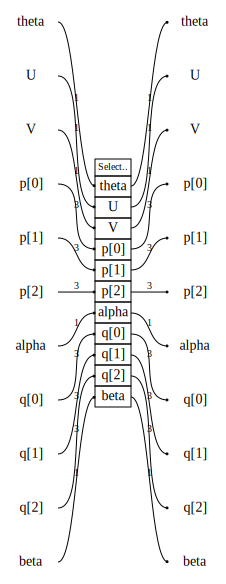

In [199]:
from cirq_qubitization.bloq_algos.chemistry.pw_dual import SelectChem

M = 8
bloq = SelectChem(8)
show_bloq(bloq)

## `PrepareChem`
PrepareChem Bloq
Args:

Registers:

#### References
(Encoding Electronic Spectra in Quantum Circuits with Linear T Complexity)[https://arxiv.org/abs/1805.03662]. Babbush et. al. 2018. Section III.A. and Fig. 4.


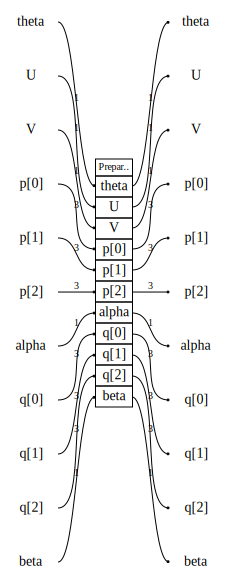

In [200]:
from cirq_qubitization.bloq_algos.chemistry.pw_dual import PrepareChem

M = 8
bloq = PrepareChem(M)
show_bloq(bloq)

## `UnaryIteration`
Placeholder for unary iteration bloq
#### References
(Encoding Electronic Spectra in Quantum Circuits with Linear T Complexity)[https://arxiv.org/abs/1805.03662]. Babbush et. al. 2018. Section III.A. and Fig. 4.


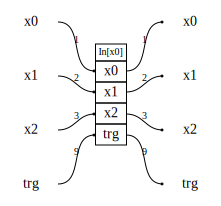

In [201]:
from cirq_qubitization.bloq_algos.chemistry.pw_dual import UnaryIteration

shape = (2, 3, 5)
bloq = UnaryIteration(shape, 9)
show_bloq(bloq)

## `SelectedMajoranaFermion`
SelectMajoranaFermion Bloq
Args:

Registers:

#### References
(Encoding Electronic Spectra in Quantum Circuits with Linear T Complexity)[https://arxiv.org/abs/1805.03662]. Babbush et. al. 2018. Section III.A. and Fig. 4.


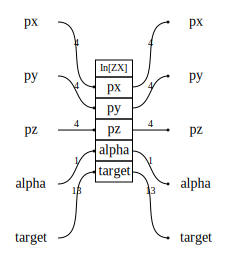

In [202]:
import numpy as np

from cirq_qubitization.bloq_algos.basic_gates import XGate
from cirq_qubitization.bloq_algos.chemistry.pw_dual import SelectedMajoranaFermion

# selection_desc = (("sel_reg", (3, )), ("alpha", (2,)))
# selection_desc = (("sel_reg", (8, 8, 8)), ("alpha", (2,)))
pmax = 10
selection_desc = (("px", pmax), ("py", pmax), ("pz", pmax), ("alpha", 2))
target_desc = ("target", 3*4+1)
bloq = SelectedMajoranaFermion(selection_desc, target_desc, XGate())
show_bloq(bloq)

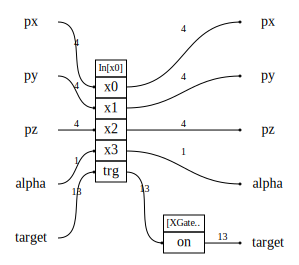

In [203]:
cbloq = SelectedMajoranaFermion(selection_desc, target_desc, XGate()).decompose_bloq()
show_bloq(cbloq)

SelectedMajoranaFermion(selection_desc=(('px', 10), ('py', 10), ('pz', 10), ('alpha', 2)), target_desc=('target', 13), gate=XGate(), cvs=()) -- 1 -> UnaryIteration(iteration_ranges=(10, 10, 10, 2), target_bitsize=13)
SelectedMajoranaFermion(selection_desc=(('px', 10), ('py', 10), ('pz', 10), ('alpha', 2)), target_desc=('target', 13), gate=XGate(), cvs=()) -- 1 -> GateOn(bitsize=13, gate=XGate())
UnaryIteration(iteration_ranges=(10, 10, 10, 2), target_bitsize=13) -- 7996 -> TGate()


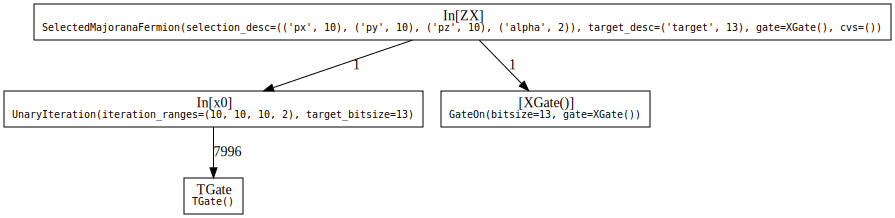

In [204]:
from cirq_qubitization.quantum_graph.bloq_counts import get_counts_graph, print_counts_graph, \
    GraphvizCounts, markdown_bloq_expr, markdown_counts_graph, SympySymbolAllocator
graph, sigma = get_counts_graph(SelectedMajoranaFermion(selection_desc, target_desc, XGate()))
print_counts_graph(graph)
GraphvizCounts(graph).get_svg()